In [10]:


# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [11]:
df=pd.read_csv("dataset11 (1).csv")
df

step_count  mood  calories_burned  hours_of_sleep  bool_of_active  \
0         5464   200              181               5               0   
1         6041   100              197               8               0   
2           25   100                0               5               0   
3         5461   100              174               4               0   
4         6915   200              223               5             500   
..         ...   ...              ...             ...             ...   
89         702   200               23               3               0   
90         133   100                4               2               0   
91         153   100                0               8               0   
92         500   300                0               5             500   
93        2127   200                0               5               0   

    weight_kg  
0          66  
1          66  
2          66  
3          66  
4          66  
..        ...  
89         64  
90         64  
91         64  
92         64  
93         64  

[94 rows x 6 columns]

In [12]:
df.head()
df.sample(10)

step_count  mood  calories_burned  hours_of_sleep  bool_of_active  \
12        4732   300              150               6             500   
56         774   300               23               6             500   
9         1258   100               40               6               0   
71        1696   200               55               4               0   
72        4921   100              158               5             500   
6         4340   100              140               6               0   
38        3149   300              101               5             500   
36        6314   300              193               6             500   
52         995   300               32               6             500   
69         437   300               14               3             500   

    weight_kg  
12         65  
56         64  
9          65  
71         64  
72         64  
6          66  
38         64  
36         64  
52         64  
69         64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
step_count         94 non-null int64
mood               94 non-null int64
calories_burned    94 non-null int64
hours_of_sleep     94 non-null int64
bool_of_active     94 non-null int64
weight_kg          94 non-null int64
dtypes: int64(6)
memory usage: 4.5 KB


In [14]:
print(df.shape)
print(df.describe())



(94, 6)
        step_count        mood  calories_burned  hours_of_sleep  \
count    94.000000   94.000000        94.000000       94.000000   
mean   2896.010638  210.638298        92.851064        5.223404   
std    2114.027525   84.837714        70.016735        1.532124   
min      25.000000  100.000000         0.000000        2.000000   
25%     717.000000  100.000000        22.250000        4.000000   
50%    2987.500000  200.000000        96.000000        5.000000   
75%    4517.500000  300.000000       148.250000        6.000000   
max    7102.000000  300.000000       234.000000        9.000000   

       bool_of_active  weight_kg  
count       94.000000  94.000000  
mean       212.765957  64.287234  
std        248.537244   0.632835  
min          0.000000  64.000000  
25%          0.000000  64.000000  
50%          0.000000  64.000000  
75%        500.000000  64.000000  
max        500.000000  66.000000  


In [15]:
df.groupby('bool_of_active').size()

bool_of_active
0      54
500    40
dtype: int64

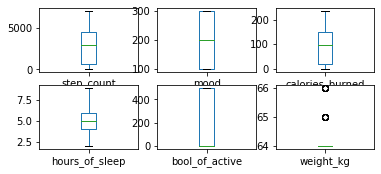

In [16]:
df.plot(kind='box', subplots=True,layout=(3,3), sharex=False, sharey=False)
plt.show()

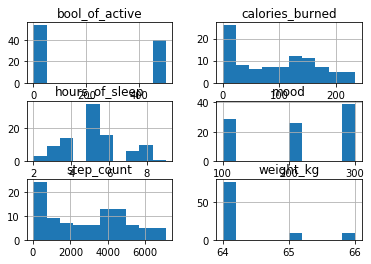

In [17]:
df.hist()
plt.show()

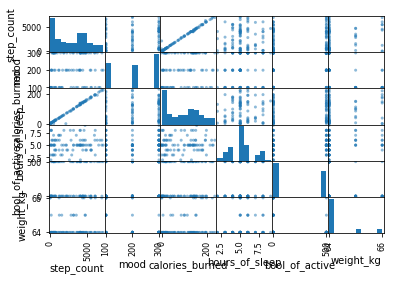

In [18]:
scatter_matrix(df)
plt.show()

In [22]:
# Split dataset into train, test and validation sets
array = df.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)



In [23]:
# Building and evaluating  classification Algorithms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))



In [24]:
# evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.558929 (0.180534)
LDA: 0.562500 (0.167562)
KNN: 0.607143 (0.179994)
CART: 0.528571 (0.127075)
NB: 0.596429 (0.149446)
SVM: 0.592857 (0.161664)


/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

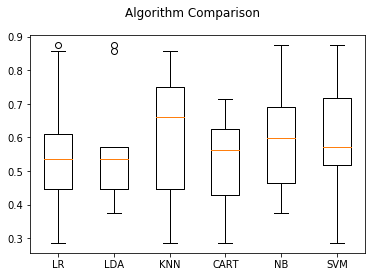

In [25]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
# Make predictions on validation with  KNeighbors Classifier


knn =KNeighborsClassifier() 
knn.fit(X_train, Y_train)
predictions=knn.predict(X_validation)

print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))




0.5789473684210527
[[7 2]
 [6 4]]
              precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
         500       0.67      0.40      0.50        10

    accuracy                           0.58        19
   macro avg       0.60      0.59      0.57        19
weighted avg       0.61      0.58      0.56        19



In [27]:
# Make predictions on validation with  SVC Classifier


SVM =SVC() 
SVM.fit(X_train, Y_train)
predictions=SVM.predict(X_validation)

print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))




0.47368421052631576
[[ 9  0]
 [10  0]]
              precision    recall  f1-score   support

           0       0.47      1.00      0.64         9
         500       0.00      0.00      0.00        10

    accuracy                           0.47        19
   macro avg       0.24      0.50      0.32        19
weighted avg       0.22      0.47      0.30        19



/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shaikha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# Make predictions on validation with  DecisionTreeClassifier
CART =DecisionTreeClassifier() 
CART.fit(X_train, Y_train)
predictions=CART.predict(X_validation)

print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))




0.631578947368421
[[7 2]
 [5 5]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
         500       0.71      0.50      0.59        10

    accuracy                           0.63        19
   macro avg       0.65      0.64      0.63        19
weighted avg       0.65      0.63      0.63        19

